<a href="https://colab.research.google.com/github/Reshma-Nadaf/Heart-Disease-or-Attack-Prediction-Model/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('always')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('HeartDisease.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31948 entries, 0 to 31947
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  31948 non-null  float64
 1   HighBP                31948 non-null  float64
 2   HighChol              31948 non-null  float64
 3   BMI                   31948 non-null  float64
 4   Smoker                31948 non-null  float64
 5   Diabetes              31948 non-null  float64
 6   PhysActivity          31948 non-null  float64
 7   Fruits                31948 non-null  float64
 8   Veggies               31948 non-null  float64
 9   HvyAlcoholConsump     31948 non-null  float64
 10  MentHlth              31948 non-null  float64
 11  PhysHlth              31948 non-null  float64
 12  Sex                   31948 non-null  float64
 13  Age                   31948 non-null  float64
 14  Education             31948 non-null  float64
 15  Income             

In [ ]:
print('shape of the dataset is ', df.shape)

shape of the dataset is  (253680, 16)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


There are few null cells in Age, Education and Income columns

In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
df.dropna(subset = ['HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'], inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
MentHlth                float64
PhysHlth                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

# **Exploratory Data Analysis**

**Univarient distributions of various features**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

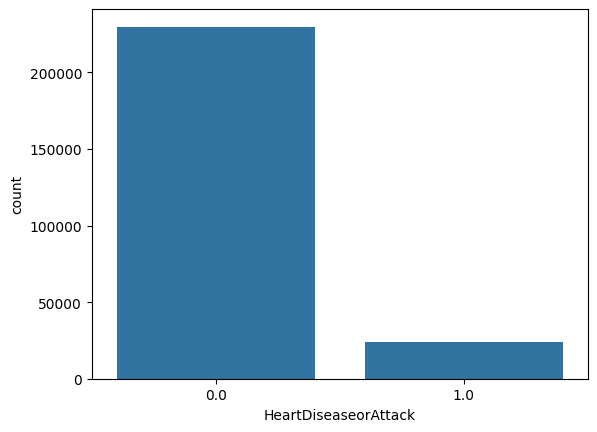

In [ ]:
sns.countplot(data =df, x= 'HeartDiseaseorAttack')

The data is imbalanced

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Smoker', ylabel='Count'>

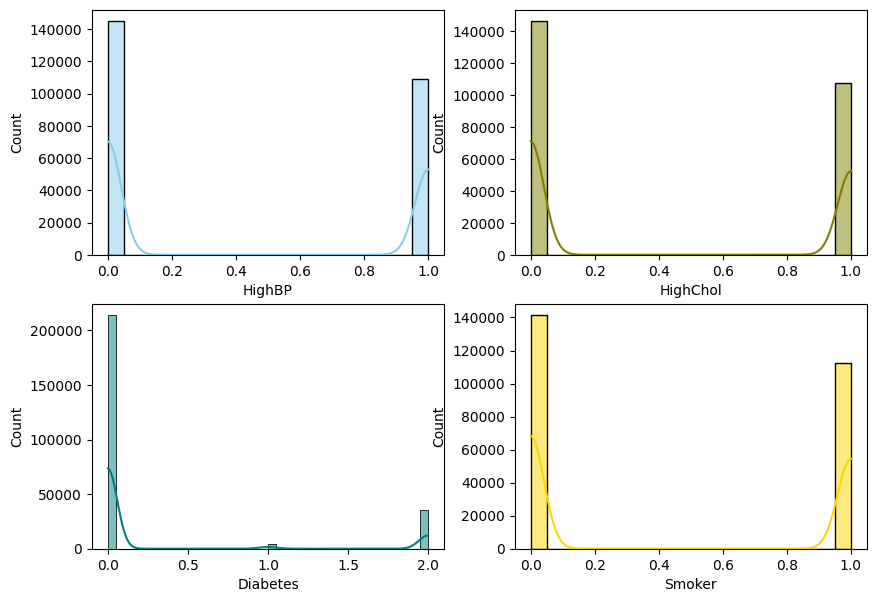

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
sns.histplot(data=df, x="HighBP", kde=True, color="skyblue", ax=axs[0, 0], binwidth = .05)
sns.histplot(data=df, x="HighChol", kde=True, color="olive", ax=axs[0, 1], binwidth = .05)
sns.histplot(data=df, x="Diabetes", kde=True, color="teal", ax=axs[1, 0], binwidth = .05)
sns.histplot(data=df, x="Smoker", kde=True, color="gold", ax=axs[1, 1], binwidth = .05)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Income', ylabel='Count'>

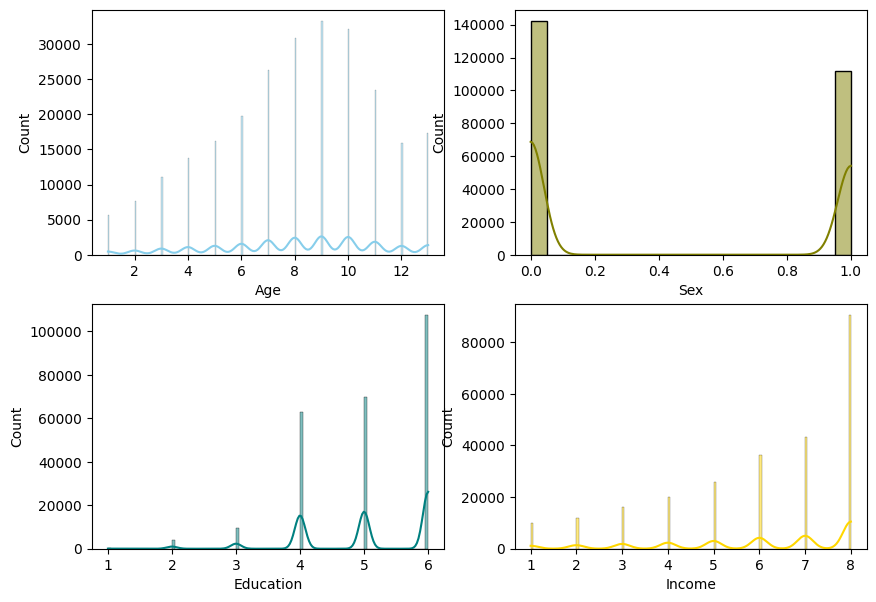

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
sns.histplot(data=df, x="Age", kde=True, color="skyblue", ax=axs[0, 0], binwidth = .05)
sns.histplot(data=df, x="Sex", kde=True, color="olive", ax=axs[0, 1], binwidth = .05)
sns.histplot(data=df, x="Education", kde=True, color="teal", ax=axs[1, 0], binwidth = .05)
sns.histplot(data=df, x="Income", kde=True, color="gold", ax=axs[1, 1], binwidth = .05)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='MentHlth', ylabel='Count'>

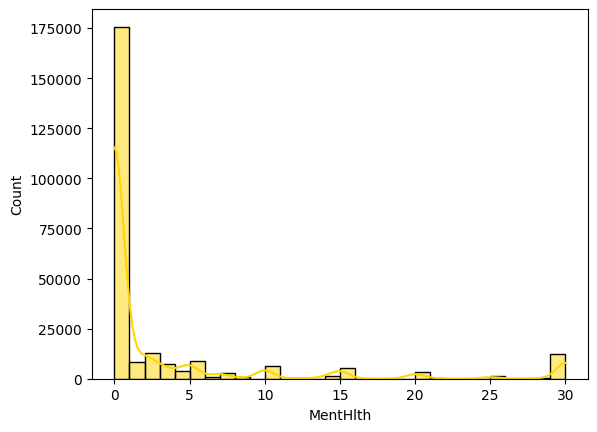

In [ ]:
fig, axs = plt. figsize=(8, 4)
sns.histplot(data=df, x="MentHlth", kde=True, color="gold", binwidth = 1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='BMI', ylabel='Count'>

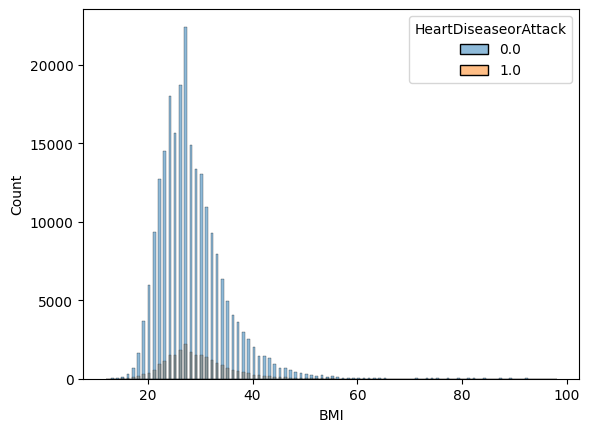

In [ ]:
sns.histplot(data = df, x = 'BMI',hue = df.HeartDiseaseorAttack,  color = 'gold', binwidth = 0.5)

Only BMI tends to have normal distribution, rest all features has binomial distribution

**Bivarient Distribution between HeartDiases and other features**



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='HighBP', ylabel='count'>

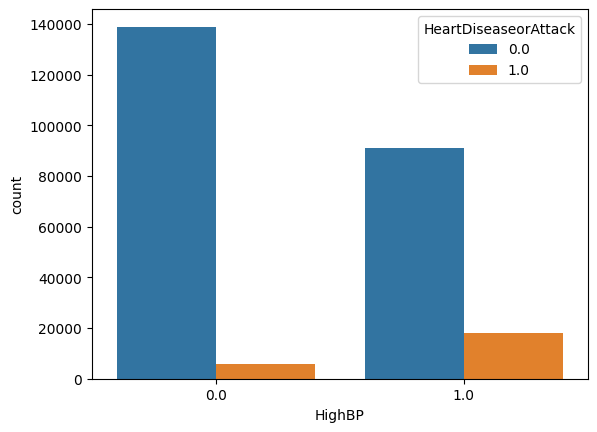

In [ ]:
sns.countplot(data = df, x= 'HighBP', hue = 'HeartDiseaseorAttack')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='HighChol', ylabel='count'>

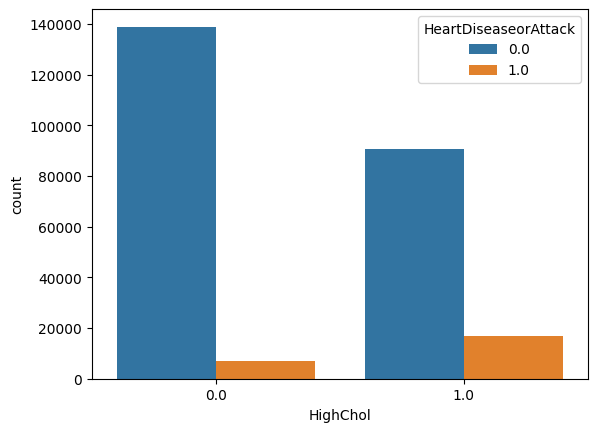

In [ ]:
sns.countplot(data = df, x= 'HighChol', hue = 'HeartDiseaseorAttack')

People not having HighBP and HighCholestrol, are less prone to have Heart Diasese

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Diabetes', ylabel='count'>

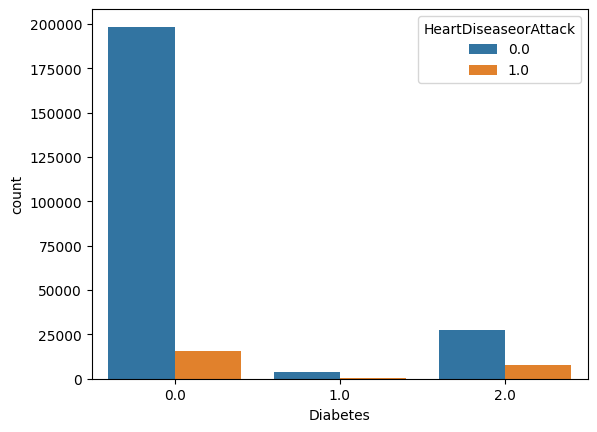

In [ ]:
sns.countplot(data = df, x= 'Diabetes', hue = 'HeartDiseaseorAttack')

From the graph, people are prone to have Heart Diasese even if they are having or not having Diabetes



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Age', ylabel='count'>

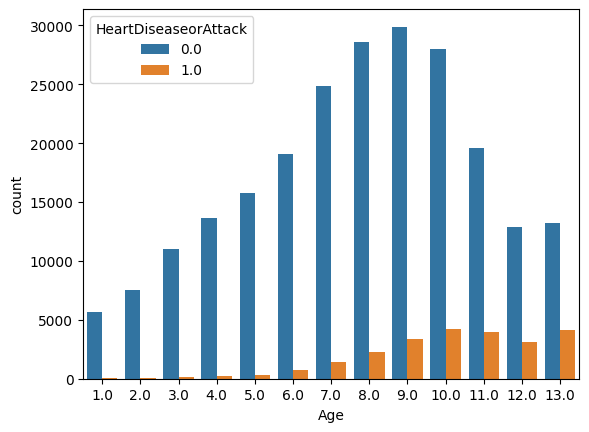

In [ ]:
sns.countplot(data = df, x= 'Age', hue = 'HeartDiseaseorAttack')

Displaying outliers in BMI feature

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='BMI', ylabel='HeartDiseaseorAttack'>

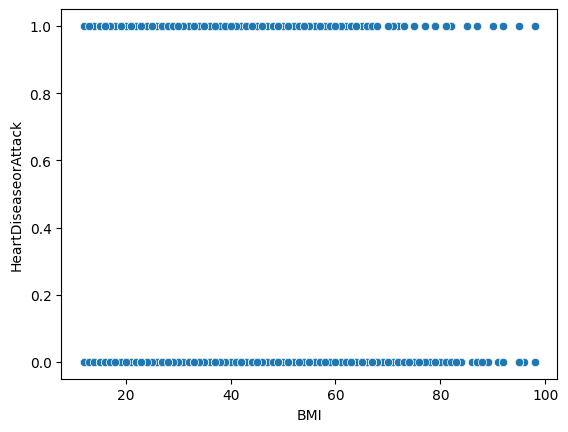

In [ ]:
sns.scatterplot(data = df, x= 'BMI', y= 'HeartDiseaseorAttack')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='BMI'>

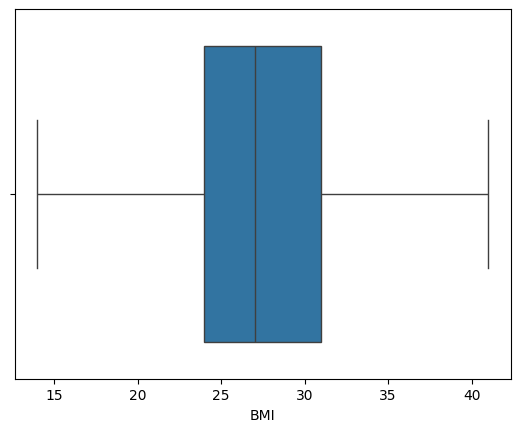

In [ ]:
def removeOutliers(df, filed_name):
  iqr = 1.5 * (np.percentile(df[filed_name], 75) - np.percentile(df[filed_name], 25))
  df.drop(df[df[filed_name] > (iqr + np.percentile(df[filed_name], 75))].index, inplace =True)
  df.drop(df[df[filed_name] < (np.percentile(df[filed_name], 25)- iqr)].index, inplace =True)

removeOutliers(df, 'BMI')
sns.boxplot(data = df, x= 'BMI')

From the above graph, we can say that the chances of having Heart Diasese is more among Elder people

In [ ]:
df_1 = pd.crosstab(df.HighBP, df.HeartDiseaseorAttack)
df_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HeartDiseaseorAttack,0.0,1.0
HighBP,,
0.0,135577,5812
1.0,85570,16874


In [ ]:
df_2 = pd.crosstab(df.HighBP, df.HeartDiseaseorAttack)
df_2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HeartDiseaseorAttack,0.0,1.0
HighBP,,
0.0,135577,5812
1.0,85570,16874


In [ ]:
df_3 = pd.crosstab(df.Diabetes, df.HeartDiseaseorAttack)
df_3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HeartDiseaseorAttack,0.0,1.0
Diabetes,,
0.0,192653,14861
1.0,3703,637
2.0,24791,7188


In [ ]:
print(df.HeartDiseaseorAttack.value_counts())
print((df.HeartDiseaseorAttack.value_counts()/df.shape[0])*100)
# The data is highly impalanced

HeartDiseaseorAttack
0.0    221147
1.0     22686
Name: count, dtype: int64
HeartDiseaseorAttack
0.0    90.696091
1.0     9.303909
Name: count, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


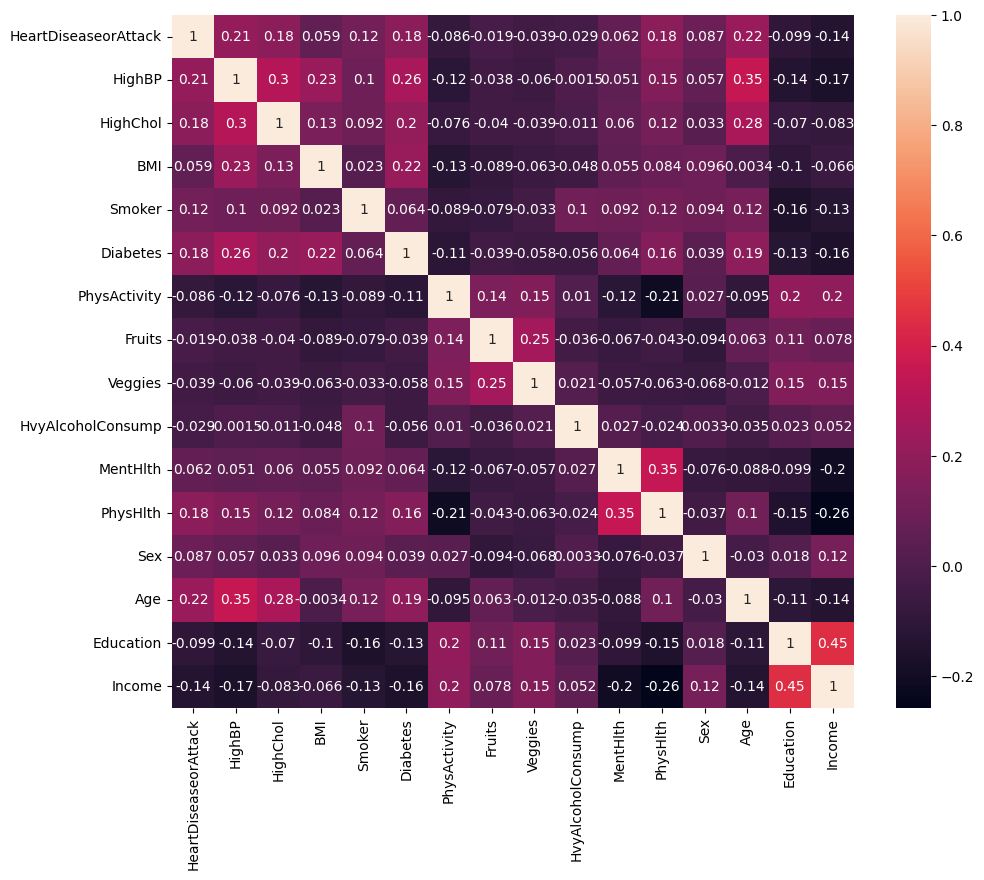

In [ ]:
plt.figure(figsize = (11,9))
sns.heatmap(df.corr(), annot = True)
plt.show()

**From the above plotted heatmap we can say, major drivers of Heart Diseases are HighBP, HighChol, Smoker, Diabetes, Age**



In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
X = df[['HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes','MentHlth', 'PhysHlth', 'Age', 'Sex']]
X = X.astype(int)
y = df['HeartDiseaseorAttack'].astype(int)

In [ ]:
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_1 = pd.DataFrame(sc.fit_transform(X))


In [ ]:
df.HeartDiseaseorAttack.value_counts()

HeartDiseaseorAttack
0.0    29154
1.0     2794
Name: count, dtype: int64

## **random sampling the dataset before splitting in into train and test**

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state= 10)
x_over, y_over = sm.fit_resample(X_1, y)

print(Counter(y))
print(Counter(y_over))

under = RandomUnderSampler(sampling_strategy= 'majority')
# fit and apply the transform
x_1, y_1 = under.fit_resample(x_over, y_over)
print(Counter(y_1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Counter({0: 221147, 1: 22686})
Counter({0: 221147, 1: 221147})
Counter({0: 221147, 1: 221147})


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y_1, test_size = 0.3, random_state = 42, stratify= y_1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(309605, 9)
(309605,)
(132689, 9)
(132689,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# describing the hypertunning parameters for Random Forest Classifier
param_grid = {
    "criterion" : ["gini", "entropy"],
    'max_depth': [3, 6, 9],
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
randomforest = GridSearchCV(RandomForestClassifier(random_state = 42),
                           param_grid=param_grid, scoring = 'recall')
randomforest.fit(x_train, y_train)
print(randomforest.best_estimator_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(criterion='entropy', max_depth=9, random_state=42)


In [ ]:
def calculate_metrics(model_name, x_values, y_actual):
  y_predicted = model_name.predict(x_values)
  y_predicted = np.round(y_predicted)
  precision_scr = precision_score(y_actual,y_predicted)
  recall_scr = recall_score(y_actual,y_predicted)
  f1_scr = f1_score(y_actual,y_predicted)
  acc_scr = accuracy_score(y_actual, y_predicted)
  return precision_scr, recall_scr, f1_scr, acc_scr



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
precision, recall, f1, accuracy = calculate_metrics(randomforest, x_train, y_train)
print('scores for training data')
print("Precision score with Randome Forest model:", np.round(precision, 2))
print("Recall score with Randome Forest model:", np.round(recall,2))
print("F1 Score with Randome Forest model:", np.round(f1, 2))
print("Accuracy with Randome Forest model:", np.round(accuracy, 2))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


scores for training data
Precision score with Randome Forest model: 0.76
Recall score with Randome Forest model: 0.86
F1 Score with Randome Forest model: 0.81
Accuracy with Randome Forest model: 0.79


In [ ]:
print('Scores for Test Data')
print(classification_report(y_test, randomforest.predict(x_test)))

Scores for Test Data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.84      0.72      0.78     66345
           1       0.76      0.86      0.80     66344

    accuracy                           0.79    132689
   macro avg       0.80      0.79      0.79    132689
weighted avg       0.80      0.79      0.79    132689



In [ ]:
confusion_matrix(y_test, randomforest.predict(x_test))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[47972, 18373],
       [ 9329, 57015]])

From the confusion matrix we can see that there are relatively **less number of False Negative** predictions which is good, as False Negative predictions are crucial in this case.

# **Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression()

In [ ]:
precision, recall, f1, accuracy = calculate_metrics(lr, x_train, y_train)
print('Mertices scores for training data')
print("Precision score with logistic regression model:",  round(precision, 2))
print("Recall score with logistic regression model:", round(recall, 2))
print("F1 Score with logistic regression model:", round(f1, 2))
print("Accuracy with logistic regression  model:", round(accuracy, 2))
print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mertices scores for training data
Precision score with logistic regression model: 0.74
Recall score with logistic regression model: 0.78
F1 Score with logistic regression model: 0.76
Accuracy with logistic regression  model: 0.75




In [ ]:
print('Mertices scores for Test Data')
print(classification_report(y_test, lr.predict(x_test)))

Mertices scores for Test Data


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.77      0.72      0.74     66345
           1       0.74      0.78      0.76     66344

    accuracy                           0.75    132689
   macro avg       0.75      0.75      0.75    132689
weighted avg       0.75      0.75      0.75    132689



In [ ]:
confusion_matrix(y_test, lr.predict(x_test))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[47685, 18660],
       [14500, 51844]])

# **Dicission Tree**

In [ ]:
dtree = DecisionTreeClassifier(random_state = 42, min_samples_leaf=2)

param_grid = {
    "criterion" : ["gini", "entropy"],
    'max_depth': [3, 6, 9],
    'min_samples_split' : [2,4]
}

decisionTree = GridSearchCV(dtree,
                           param_grid=param_grid, scoring = 'recall')
decisionTree.fit(x_train, y_train)
print(decisionTree.best_estimator_)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)


In [ ]:
y_pred_tree = decisionTree.predict(x_test)
df_testPred = pd.DataFrame({'Actual y_test': y_test, 'Predicted y': y_pred_tree})
df_testPred.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Actual y_test,Predicted y
148496,0,1
357707,1,1
249102,1,1
125670,0,1
268420,1,1


In [ ]:
precision, recall, f1, accuracy = calculate_metrics(decisionTree, x_train, y_train)
print('Mertices scores for training data')
print("Precision score with Decision Tree model:",  round(precision, 2))
print("Recall score with Decision Tree model:", round(recall, 2))
print("F1 Score with Decision Tree model:", round(f1, 2))
print("Accuracy with Decision Tree model:", round(accuracy, 2))
print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mertices scores for training data
Precision score with Decision Tree model: 0.68
Recall score with Decision Tree model: 0.84
F1 Score with Decision Tree model: 0.75
Accuracy with Decision Tree model: 0.72




In [ ]:
print('Scores for Test Data')
print(classification_report(y_test, decisionTree.predict(x_test)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Scores for Test Data
              precision    recall  f1-score   support

           0       0.79      0.61      0.69     66345
           1       0.68      0.84      0.75     66344

    accuracy                           0.72    132689
   macro avg       0.74      0.72      0.72    132689
weighted avg       0.74      0.72      0.72    132689



# **XGBOOST Classifier**

In [ ]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
precision, recall, f1, accuracy = calculate_metrics(xgb, x_train, y_train)
print('Mertices scores for training data')
print("Precision score with XGBoost model:",  round(precision, 2))
print("Recall score with XGBoost model:", round(recall, 2))
print("F1 Score with XGBoost model:", round(f1, 2))
print("Accuracy with XGBoost model:", round(accuracy, 2))
print("\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mertices scores for training data
Precision score with XGBoost model: 0.88
Recall score with XGBoost model: 0.87
F1 Score with XGBoost model: 0.87
Accuracy with XGBoost model: 0.88




In [ ]:
print('Scores for Test Data')
print(classification_report(y_test, xgb.predict(x_test)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Scores for Test Data
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     66345
           1       0.88      0.86      0.87     66344

    accuracy                           0.87    132689
   macro avg       0.87      0.87      0.87    132689
weighted avg       0.87      0.87      0.87    132689



In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(x_test)

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
     # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }

    # Convert dictionary
    df_metrics = pd.DataFrame(metrics, index=[model_name]).round(2)

    return df_metrics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
xg_evaluation = evaluate_model(xgb, x_test, y_test, 'XGBoost')
dt_evaluation = evaluate_model(decisionTree, x_test, y_test, 'DecisionTree')
lr_evaluation = evaluate_model(lr, x_test, y_test, 'LogisticReg')
rf_evaluation = evaluate_model(randomforest, x_test, y_test, 'RandomForest')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# In the critical context of diagnosing heart disease, our primary objective is to ensure a high recall for the positive class.

* **Plublising performance of all the models on the same hold-out/testdatas**


In [ ]:
all_evaluations = [rf_evaluation, lr_evaluation, dt_evaluation, xg_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RandomForest,0.84,0.76,0.72,0.86,0.78,0.80,0.80,0.79,0.79,0.79
XGBoost,0.87,0.88,0.88,0.86,0.87,0.87,0.87,0.87,0.87,0.87
DecisionTree,0.79,0.68,0.61,0.84,0.69,0.75,0.74,0.72,0.72,0.72
LogisticReg,0.77,0.74,0.72,0.78,0.74,0.76,0.75,0.75,0.75,0.75


* **From the above plotted heatmap we can say, major drivers of Heart Diseases are HighBP, HighChol, Smoker, Diabetes, Age**





In [ ]:
from sklearn.metrics import precision_recall_curve
# Predict probability
y_prob_train = randomforest.predict_proba(x_train)[:,1]
y_prob_test = randomforest.predict_proba(x_test)[:,1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


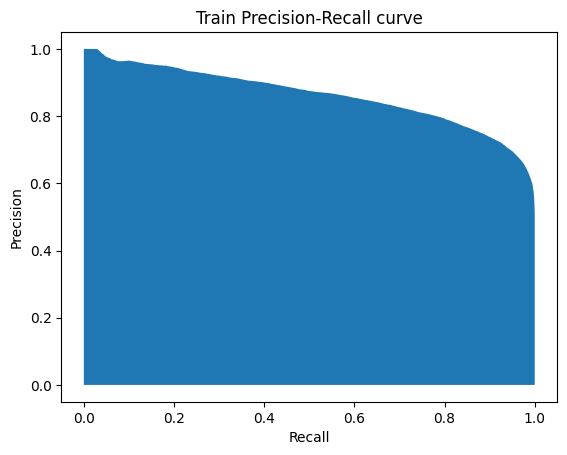

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


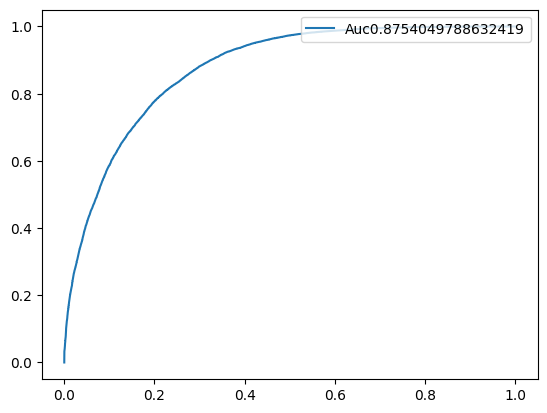

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_test_logreg_prob = randomforest.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_logreg_prob)
auc= roc_auc_score(y_test, y_pred_test_logreg_prob)

plt.plot(fpr, tpr, label= "Auc" +str(auc))
plt.legend(loc=1)

# Hence **Random Forest and XGBoost Models** are more efficent than other Machine learning models in predicting Heart diseases with **recall score** of **0.86**